In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [4]:
Teams ={
    'Royal Challengers Bangalore':'RCB', 
    'Sunrisers Hyderabad':'SRH',
    'Rising Pune Supergiant':'RPS', 
    'Mumbai Indians':'MI',
    'Kolkata Knight Riders':'KKR', 
    'Gujarat Lions':'GL', 
    'Kings XI Punjab':'KXIP',
    'Delhi Daredevils':'DD', 
    'Chennai Super Kings':'CSK', 
    'Rajasthan Royals':'RR',
    'Deccan Chargers':'DC', 
    'Kochi Tuskers Kerala':'KTK', 
    'Pune Warriors':'PW'
}

In [5]:
df['batting_team'] = df['batting_team'].map(Teams)
df['bowling_team'] = df['bowling_team'].map(Teams)

In [6]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [7]:
df['batting_team'][:5]

0    SRH
1    SRH
2    SRH
3    SRH
4    SRH
Name: batting_team, dtype: object

In [15]:
runs = df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)
runs

,inning,batting_team,total_runs
0,1,SRH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183
...,...,...,...
1265,2,KKR,140
1266,1,GL,162
1267,2,SRH,163
1268,1,SRH,208


In [21]:
inning1 = runs[runs['inning']==1]
inning2 = runs[runs['inning']==2]

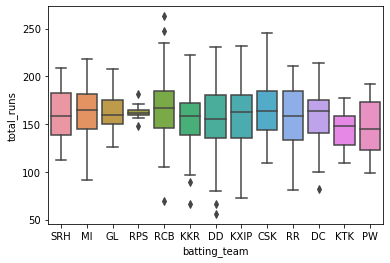

In [22]:
sns.boxplot(x='batting_team',y='total_runs',data=inning1)

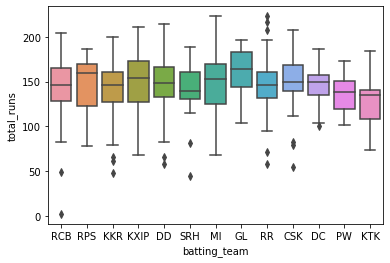

In [23]:
sns.boxplot(x='batting_team',y='total_runs',data=inning2)

In [25]:
high_scores = df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1251,634,2,KKR,SRH,140
1252,635,1,GL,SRH,162
1253,635,2,SRH,GL,163
1254,636,1,SRH,RCB,208


In [27]:
score_200 = high_scores[high_scores['total_runs']>=200]
score_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1228,620,1,RCB,GL,248
1232,623,1,MI,DD,206
1236,626,1,RCB,KXIP,211
1254,636,1,SRH,RCB,208


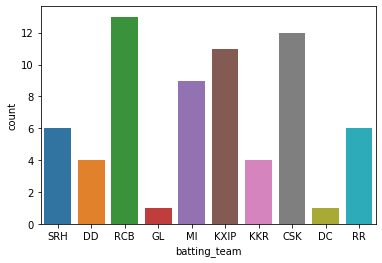

In [28]:
sns.countplot(score_200['batting_team'])

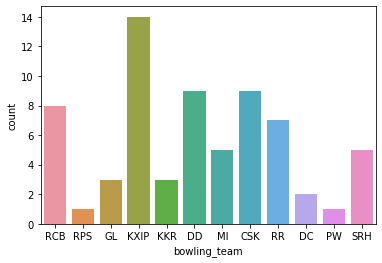

In [29]:
sns.countplot(score_200['bowling_team'])